In [1]:
# import Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew,kurtosis
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold

In [2]:
# Load Dataset
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Combine Datasets:

In [5]:
combined = pd.concat([train,test],ignore_index=True)
combined.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [6]:
# See Datatypes of Features Using Info Function:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [7]:
# (.describe) is used to see description of data
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [8]:
#Checking the bal of target variable
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [9]:
# We will analyse the Numerical Column using select dtypes:
num_cols = combined.select_dtypes(include=np.number).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [10]:
# We will analyse the Categorical Column using select dtypes:
cat_cols = combined.select_dtypes(include="object").columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Visualization

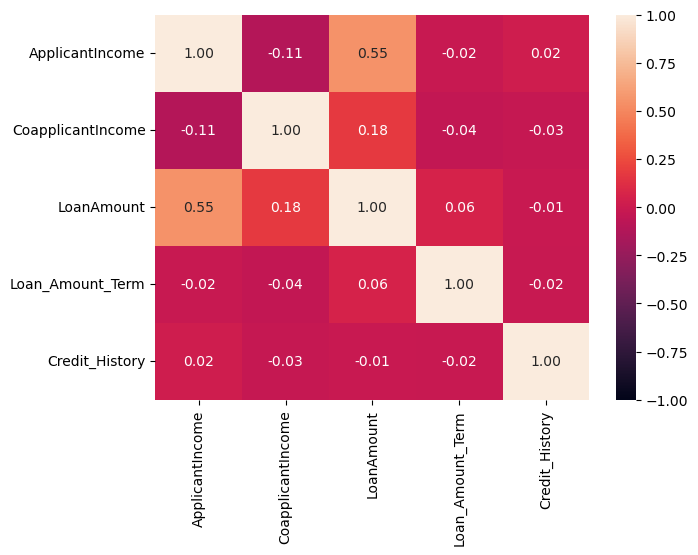

In [11]:
corr = combined.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt='.2f',vmin=-1,vmax=1);

Inferences for Heat map:
* this Heat map represents the highest correlation between the ApplicantIncome and Loan Amount

### Univariate Analysis:

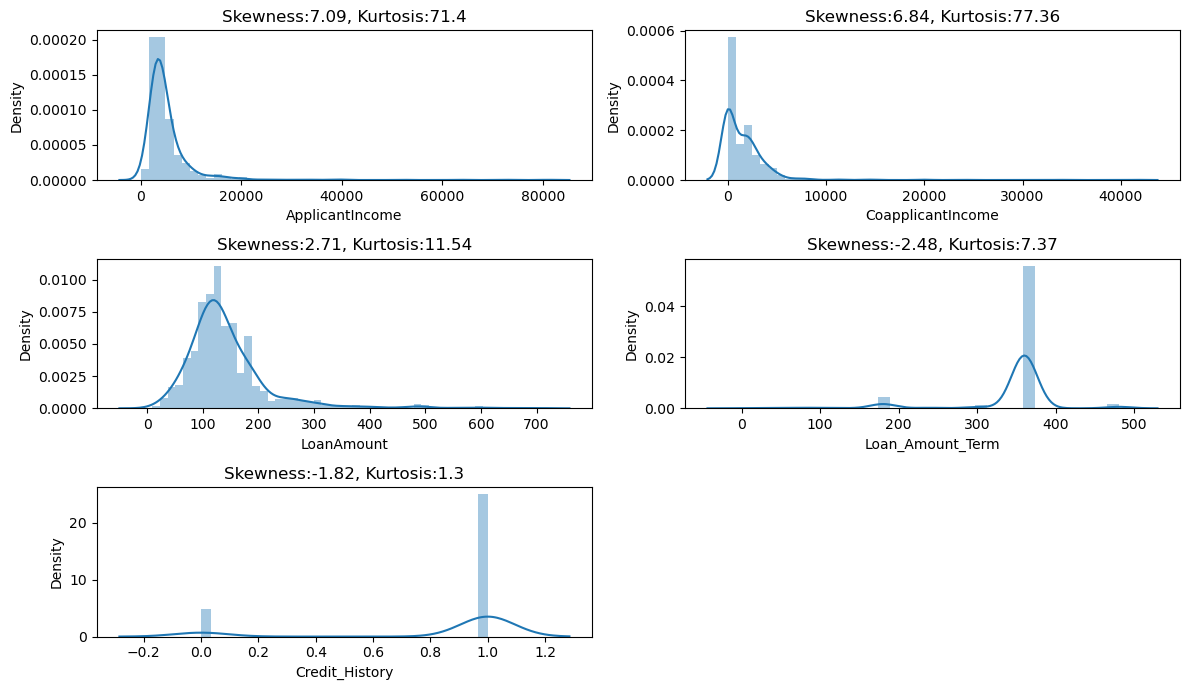

In [12]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(12,7))
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(combined[i])
    plt.title(f"Skewness:{combined[i].skew().round(2)}, Kurtosis:{combined[i].kurt().round(2)}")
    t+=1
plt.tight_layout()
plt.show()

Infernces for Univariate Analysis For Numerical Features:
* Loan Amount is Positively Skewed Data because Skewness is Greater than 0.5
* Applicant Income Is also Positive Skewed Data because Skewness is Greater than 0.5
* CoapplicantIncome Is also Positive Skewed Data because Skewness is Greater than 0.5

* Loan_Amount_Term is Negative Skewed Data because Skewness is Smaller than -0.5

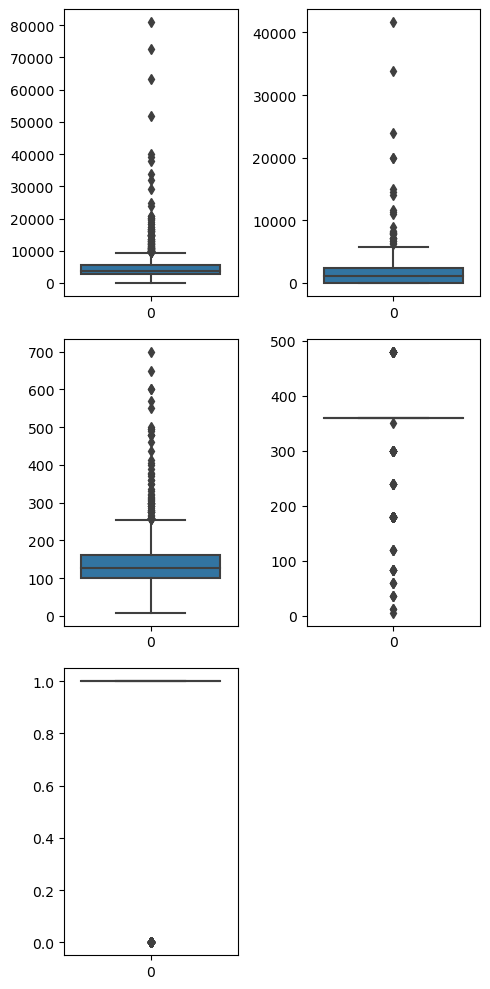

In [13]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(5,10))
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(combined[i])
    t+=1
plt.tight_layout()
plt.show()

Inferences for Univariate Analysis For Numerical Features:
* ApplicantIncome HasToo Much Outliers
* CoapplicantIncome HasToo Much Outliers
* LoanAmount HasToo Much Outliers
* Loan_Amount_Term HasToo Much Outliers

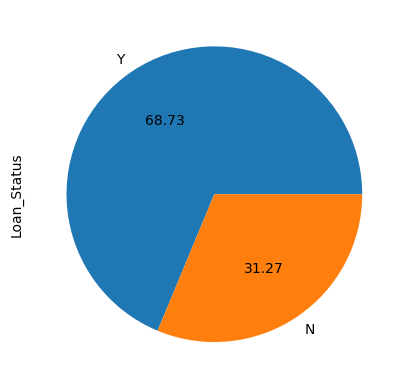

In [14]:
# Pie Plot For Loan Status(Target Variable)
combined["Loan_Status"].value_counts().plot(kind="pie",autopct="%.2f");

Inferences for Pie Plot:
* Loan status in Pie Plot represents that 68.73% people who is Approved Loan
* Loan status in Pie Plot represents that 31.27% people who is not Approved Loan

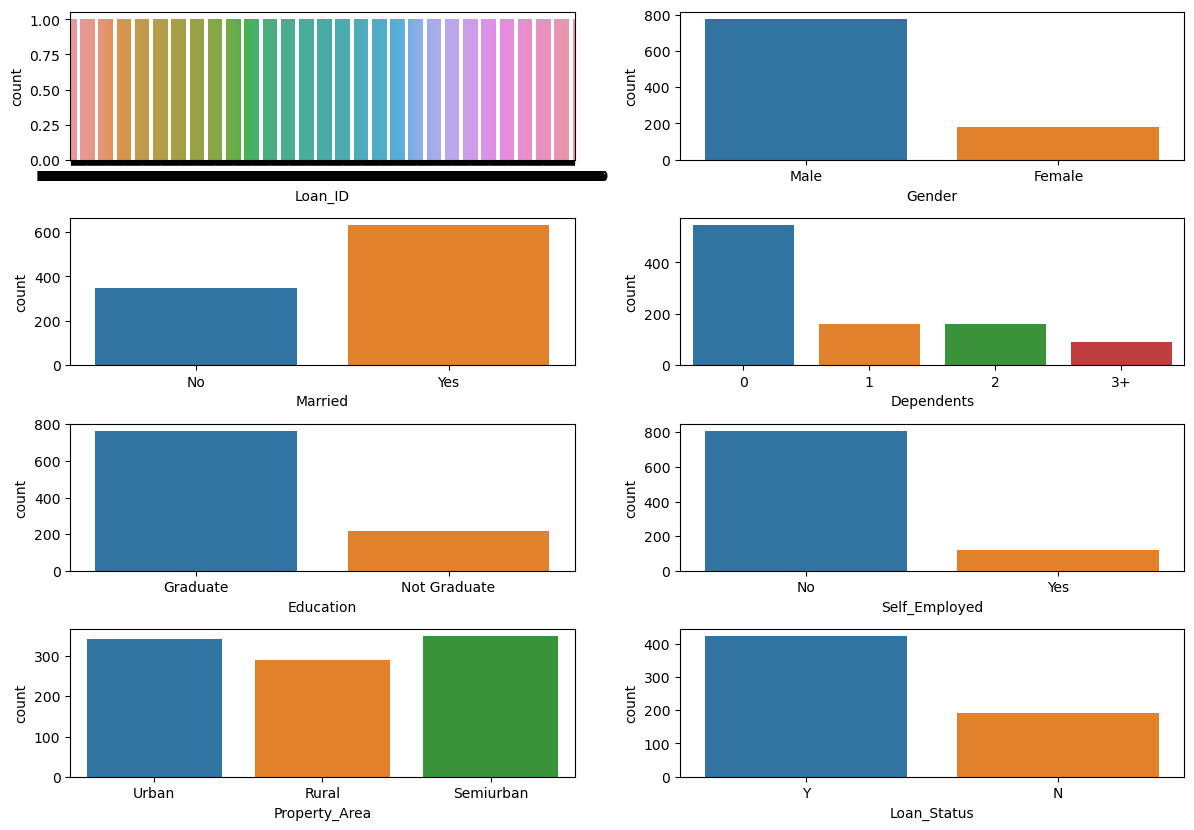

In [15]:
# Univariate Analysis For Categorical Features:
plt.figure(figsize=(12,10))
t = 1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data = combined,x= i)
    t+=1
plt.tight_layout()
plt.show()

Inferences for Categorical Variable :
* There are Male is More than Female
* There are Married is More
* In Dependents 0 class is More than other classes
* Graduates is more than Not Graduates
* There are Too Much peoples who are UnEmployed
* property area of Urban and SemiUrban is approximately same but In rural there is less Property Area
* there is too much , who has Approved Laon
* In credit History 1 class is more then 0

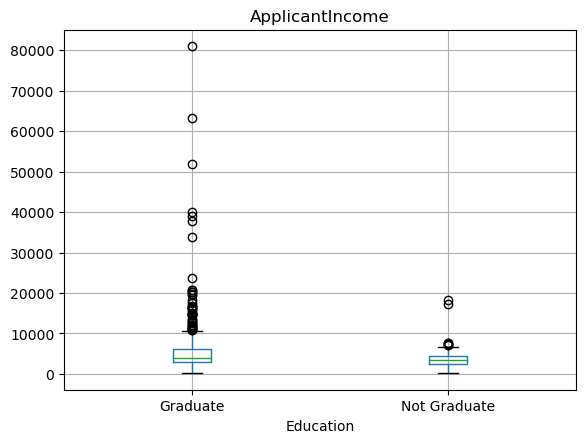

In [16]:
#Visualizing the application income considering whether applicant is graduate or not
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
plt.show()

Inferences:
* We can observe that most anomalies(Outliers) are in case of Graduates compared to non graduates

# Bivariate Analysis :

### Bivariate Analysis for Num vs cat :

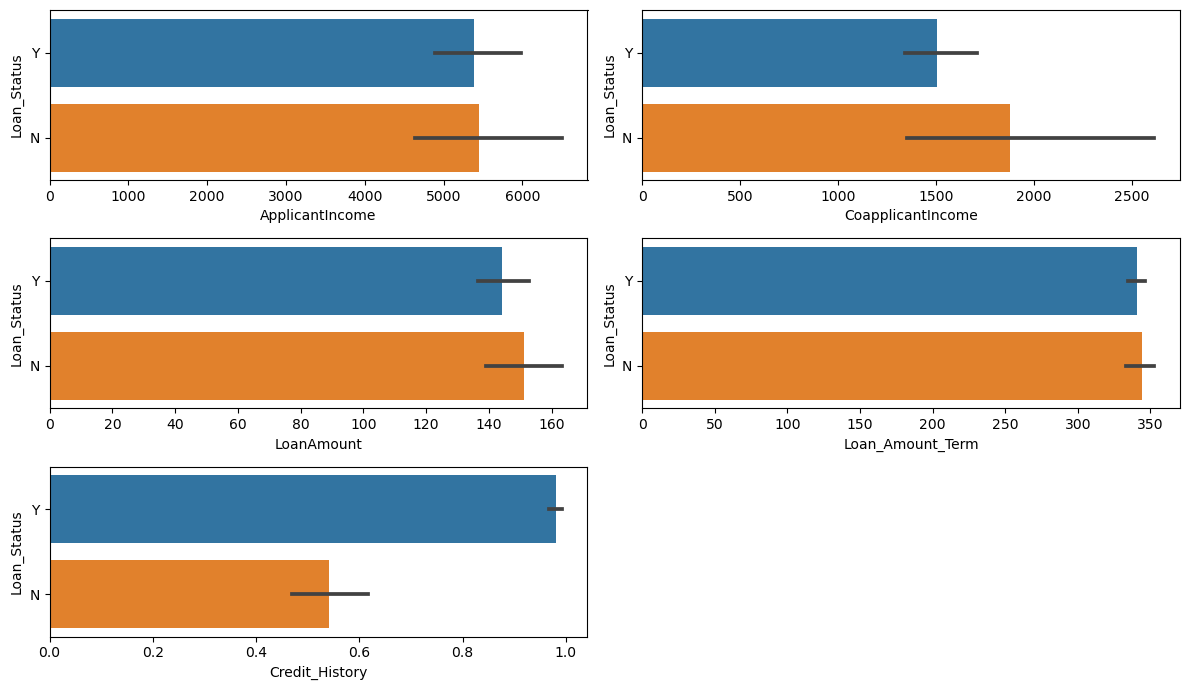

In [17]:
plt.figure(figsize=(12,7))
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.barplot(x =combined[i] ,y = combined["Loan_Status"])
    t+=1
plt.tight_layout()
plt.show()

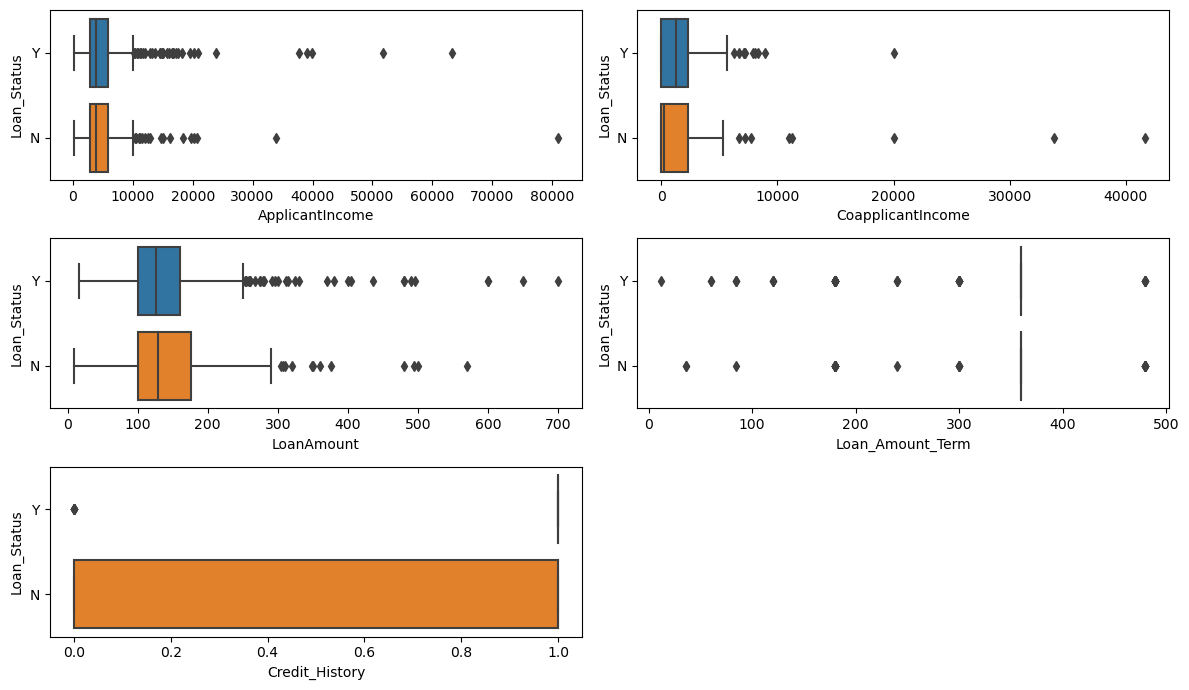

In [18]:
plt.figure(figsize=(12,7))
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(x =combined[i] ,y = combined["Loan_Status"])
    t+=1
plt.tight_layout()
plt.show()

# Bivariate Analysis for cat vs cat :

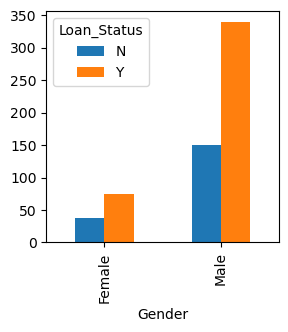

In [19]:
gender=pd.crosstab(combined["Gender"],combined["Loan_Status"])
gender.plot(kind='bar',figsize=(3,3));

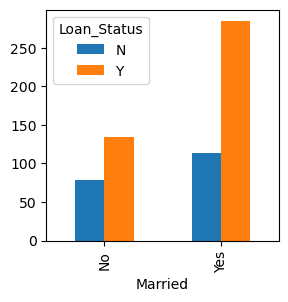

In [20]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
married.plot(kind='bar',figsize=(3,3));

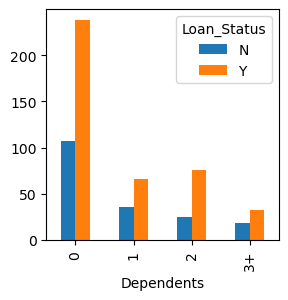

In [21]:
dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.plot(kind='bar',figsize=(3,3));

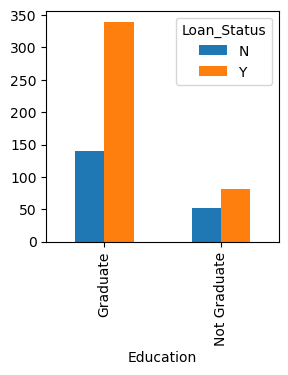

In [22]:
education=pd.crosstab(train['Education'],train['Loan_Status'])
education.plot(kind='bar',figsize=(3,3));

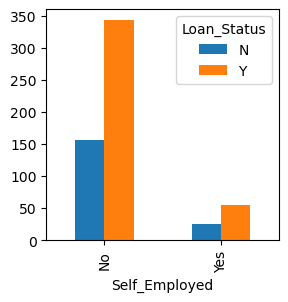

In [23]:
selfemployed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
selfemployed.plot(kind='bar',figsize=(3,3));

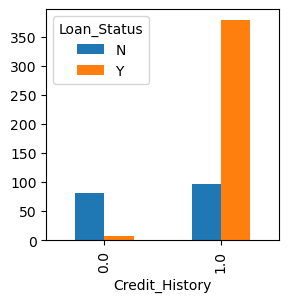

In [24]:
credithistory=pd.crosstab(train['Credit_History'],train['Loan_Status'])
credithistory.plot(kind='bar',figsize=(3,3));

Inferences for Above Bivariate Visualization:
* From the above visualisation its clear that mostly graduates, self-employed and applicants with 0 dependents have high chances of loan approval
* Applicants whose credit history is 0 have very low chances of getting loan

# Missing Value TreatMent:

In [25]:
combined.isnull().sum().sort_values(ascending=False)

Loan_Status          367
Credit_History        79
Self_Employed         55
LoanAmount            27
Dependents            25
Gender                24
Loan_Amount_Term      20
Married                3
Loan_ID                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
Property_Area          0
dtype: int64

In [26]:
#Inputing the missing numeric data with mean value
combined["LoanAmount"].fillna(combined["LoanAmount"].mean(),inplace=True)

In [27]:
#Inputing the missing numeric data with mean value
combined["CoapplicantIncome"].fillna(combined["CoapplicantIncome"].mean(),inplace=True)

In [28]:
#Inputing the missing numeric data with mean value
combined["ApplicantIncome"].fillna(combined["ApplicantIncome"].mean(),inplace=True)

In [29]:
#Inputing the missing numeric data with mean value
combined["Loan_Amount_Term"].fillna(combined["Loan_Amount_Term"].mean(),inplace=True)

In [30]:
#Inputing the missing numeric data with mean value
combined["Credit_History"].fillna(combined["Credit_History"].mean(),inplace=True)

In [31]:
#Imputing object data with mode
for i in cat_cols:
    print(i,':', combined[i].mode()[0])
    combined[i].fillna(combined[i].mode()[0],inplace=True)

Loan_ID : LP001002
Gender : Male
Married : Yes
Dependents : 0
Education : Graduate
Self_Employed : No
Property_Area : Semiurban
Loan_Status : Y


In [32]:
combined.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
#Checking the uniquness of our data
combined.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

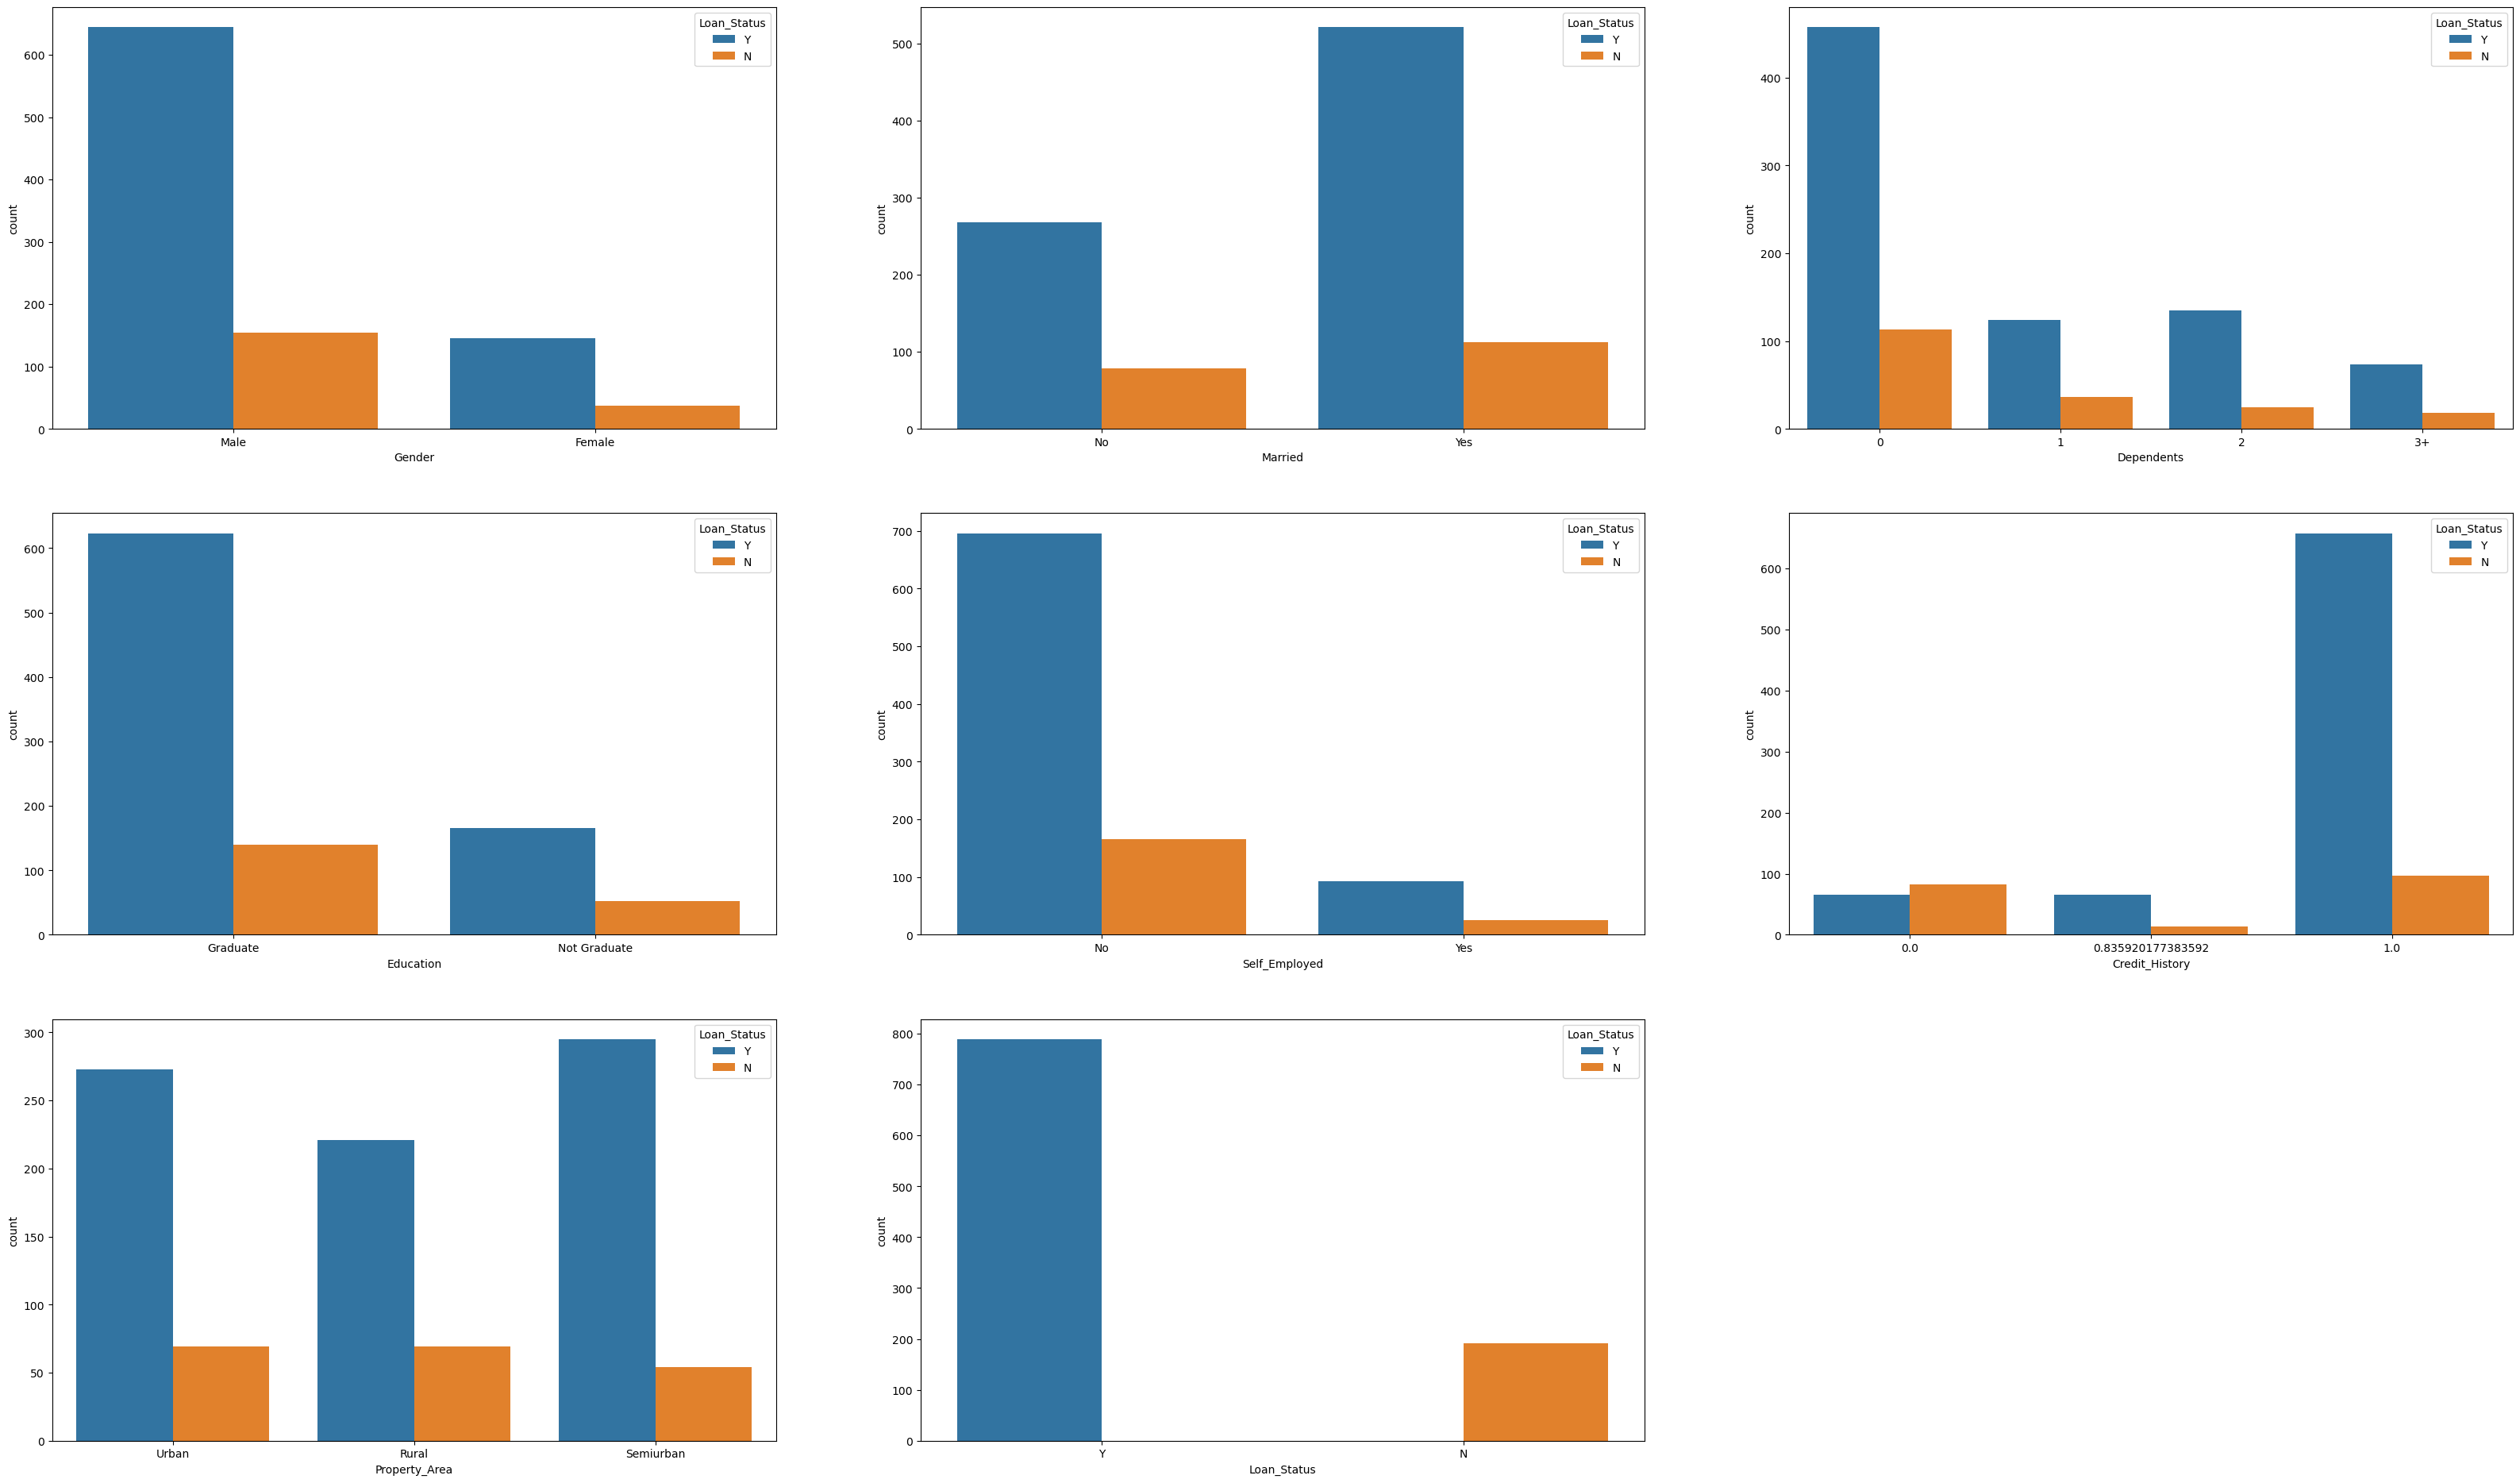

In [34]:
# Visualising features with low unique values for better understanding
v= combined[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area' \
          ,'Loan_Status']].columns
t = 1
plt.figure(figsize=(40,40))
for i,col in enumerate(v):
    plt.subplot(5,3,t)
    sns.countplot(x=combined[col],hue=combined['Loan_Status'])
    t+=1
plt.show()

# OUTLIERS TREATMENT :

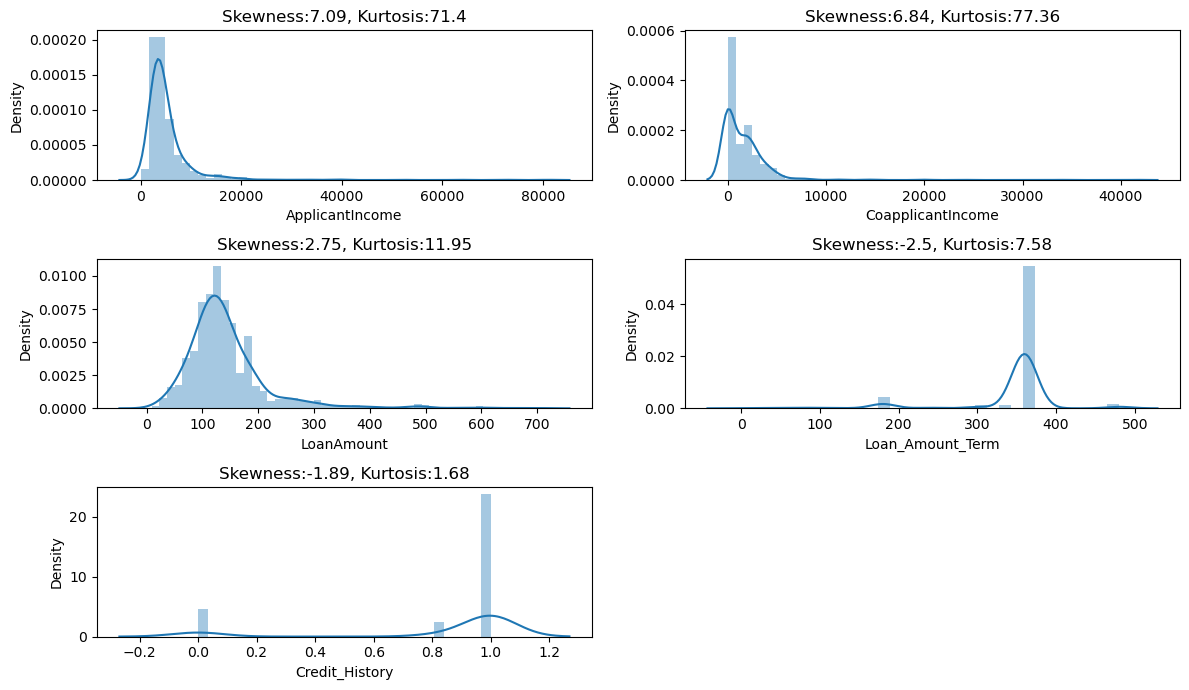

In [35]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(12,7))
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(combined[i])
    plt.title(f"Skewness:{combined[i].skew().round(2)}, Kurtosis:{combined[i].kurt().round(2)}")
    t+=1
plt.tight_layout()
plt.show()

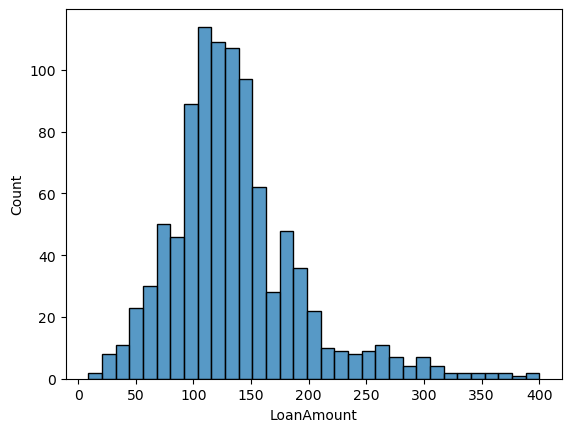

In [36]:
combined.drop(combined['LoanAmount'][combined['LoanAmount']>400].index, inplace=True)
sns.histplot(combined['LoanAmount'])
plt.show()

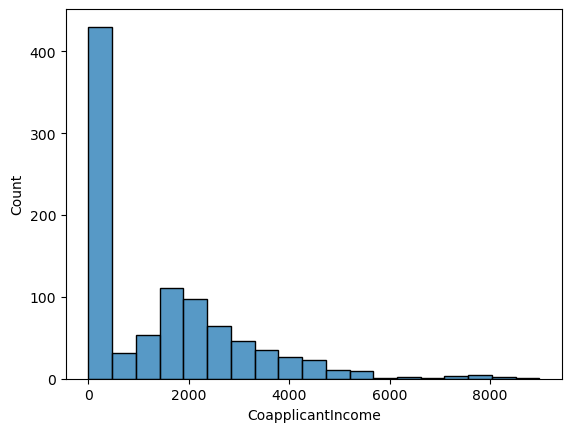

In [37]:
combined.drop(combined['CoapplicantIncome'][combined['CoapplicantIncome']>10000].index, inplace=True)
sns.histplot(combined['CoapplicantIncome'])
plt.show()

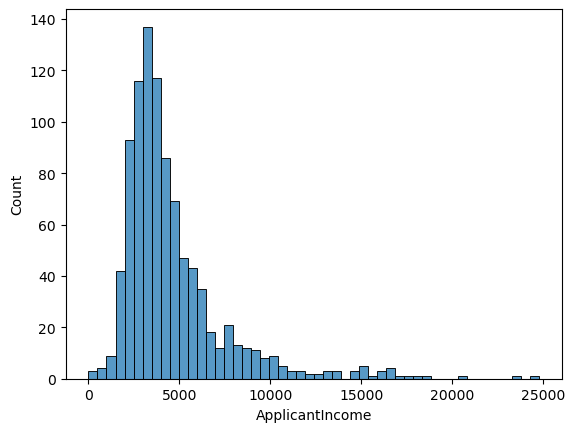

In [38]:
combined.drop(combined['ApplicantIncome'][combined['ApplicantIncome']>25000].index, inplace=True)
sns.histplot(combined['ApplicantIncome'])
plt.show()

# Treating object data types for model building

In [39]:
#Chekcing the remaining columns to treat the object data types
combined.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            949 non-null    object 
 1   Gender             949 non-null    object 
 2   Married            949 non-null    object 
 3   Dependents         949 non-null    object 
 4   Education          949 non-null    object 
 5   Self_Employed      949 non-null    object 
 6   ApplicantIncome    949 non-null    int64  
 7   CoapplicantIncome  949 non-null    float64
 8   LoanAmount         949 non-null    float64
 9   Loan_Amount_Term   949 non-null    float64
 10  Credit_History     949 non-null    float64
 11  Property_Area      949 non-null    object 
 12  Loan_Status        949 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 103.8+ KB


In [41]:
# Manipulate the Dependent Variable 3+ to 3:
combined["Dependents"] = np.where(combined["Dependents"]=="3+",3,combined["Dependents"])

In [42]:
#Converting dependents into int because the date in Contineous Form
combined["Dependents"] = combined["Dependents"].astype(int)

In [43]:
# Mapping the object columns to convert it into (0 and 1) form and then change the data type to int
combined['Married']=combined['Married'].map({'Yes':1, 'No':0})
combined['Education']=combined['Education'].map({'Graduate':1, 'Not Graduate':0})
combined['Self_Employed']=combined['Self_Employed'].map({'Yes':1, 'No':0})
combined['Loan_Status']=combined['Loan_Status'].map({'Y':1, 'N':0})

In [44]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,1,0,5849,0.0,142.51153,360.0,1.0,Urban,1
1,LP001003,Male,1,1,1,0,4583,1508.0,128.00000,360.0,1.0,Rural,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.00000,360.0,1.0,Urban,1
3,LP001006,Male,1,0,0,0,2583,2358.0,120.00000,360.0,1.0,Urban,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.00000,360.0,1.0,Urban,1


In [45]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            949 non-null    object 
 1   Gender             949 non-null    object 
 2   Married            949 non-null    int64  
 3   Dependents         949 non-null    int32  
 4   Education          949 non-null    int64  
 5   Self_Employed      949 non-null    int64  
 6   ApplicantIncome    949 non-null    int64  
 7   CoapplicantIncome  949 non-null    float64
 8   LoanAmount         949 non-null    float64
 9   Loan_Amount_Term   949 non-null    float64
 10  Credit_History     949 non-null    float64
 11  Property_Area      949 non-null    object 
 12  Loan_Status        949 non-null    int64  
dtypes: float64(4), int32(1), int64(5), object(3)
memory usage: 100.1+ KB


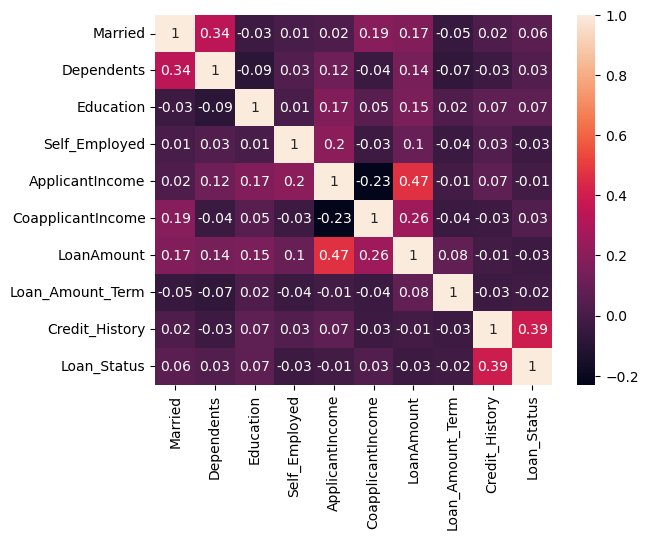

In [46]:
#Checking for correlation
sns.heatmap(np.round(combined.corr(),2),annot=True);

Inferences of Heat Map :
* Loan status is highly correlated to Credit history
* we can see some multicoreniality - for eg- applicant income is highly correlated to loan amount

#### Split the Data in Train and Test Again...

In [47]:
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [48]:
newtrain.shape, newtest.shape, train.shape, test.shape

((591, 13), (358, 13), (614, 13), (367, 12))

# Dropping redundant columns

In [49]:
newtrain.drop('Loan_ID',axis=1, inplace=True)

In [50]:
#Using get dummies for the remaining object columns for which mapping or encoder cant be used 
newtrain=pd.get_dummies(newtrain)
newtrain.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,142.51153,360.0,1.0,1,0,1,0,0,1
1,1,1,1,0,4583,1508.0,128.00000,360.0,1.0,0,0,1,1,0,0
2,1,0,1,1,3000,0.0,66.00000,360.0,1.0,1,0,1,0,0,1
3,1,0,0,0,2583,2358.0,120.00000,360.0,1.0,1,0,1,0,0,1
4,0,0,1,0,6000,0.0,141.00000,360.0,1.0,1,0,1,0,0,1


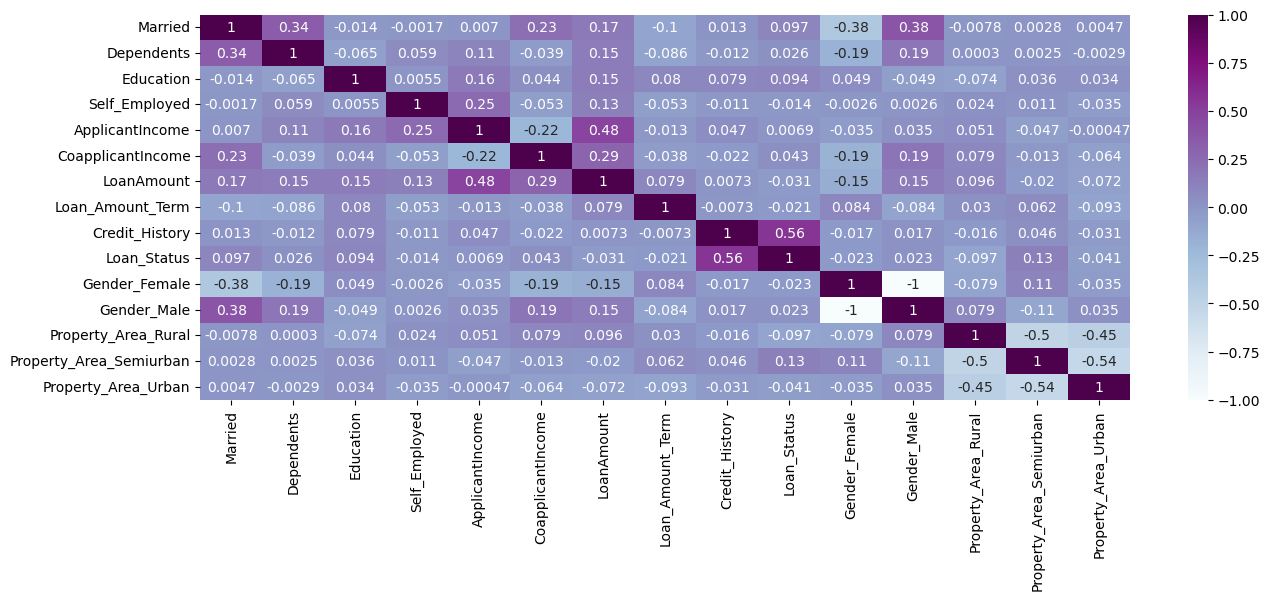

In [51]:
#Checking for correlation again now that we have treated the object columns
plt.figure(figsize=(15,5))
sns.heatmap(newtrain.corr(),cmap='BuPu',annot=True)
plt.show()

In [52]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  591 non-null    int64  
 1   Dependents               591 non-null    int32  
 2   Education                591 non-null    int64  
 3   Self_Employed            591 non-null    int64  
 4   ApplicantIncome          591 non-null    int64  
 5   CoapplicantIncome        591 non-null    float64
 6   LoanAmount               591 non-null    float64
 7   Loan_Amount_Term         591 non-null    float64
 8   Credit_History           591 non-null    float64
 9   Loan_Status              591 non-null    int64  
 10  Gender_Female            591 non-null    uint8  
 11  Gender_Male              591 non-null    uint8  
 12  Property_Area_Rural      591 non-null    uint8  
 13  Property_Area_Semiurban  591 non-null    uint8  
 14  Property_Area_Urban      5

* Finally all the object columns are treated and there are no null values in our data so we can start working on model building

# Model Building :

In [53]:
#Spliting the dataset into features and target
x=newtrain.drop('Loan_Status',axis=1)
y=newtrain["Loan_Status"]

In [54]:
#Further splitting the dataset into training and testing data
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,stratify=y)

In [55]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((443, 14), (148, 14), (443,), (148,))

In [56]:
#Using logistic regression supervised ML classification model
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [57]:
ypred=lr.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.8243243243243243
[[26 20]
 [ 6 96]]
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        46
           1       0.83      0.94      0.88       102

    accuracy                           0.82       148
   macro avg       0.82      0.75      0.77       148
weighted avg       0.82      0.82      0.81       148



# Stratified K Fold:

In [58]:
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
i=1
for train_index,test_index in kf.split(x,y):
    global model
    print('{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score: ', score)
    i+=1
    pred_test =model.predict(xtest)
    pred= model.predict_proba(xvl)[:,1]

1 of kfold 5
Accuracy score:  0.8067226890756303
2 of kfold 5
Accuracy score:  0.7966101694915254
3 of kfold 5
Accuracy score:  0.8135593220338984
4 of kfold 5
Accuracy score:  0.7966101694915254
5 of kfold 5
Accuracy score:  0.8050847457627118


# ROC-AUC Curve

In [59]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

In [60]:
print(roc_curve(ytest,ypred))

(array([0.        , 0.43478261, 1.        ]), array([0.        , 0.94117647, 1.        ]), array([inf,  1.,  0.]))


In [61]:
fpr,tpr,threshold =roc_curve(ytest,ypred)

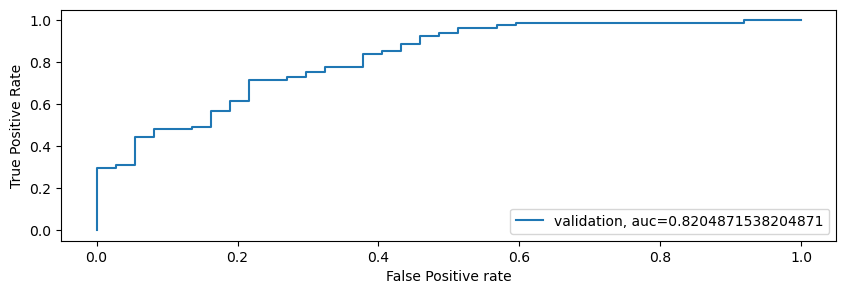

In [62]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(10,3))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')   
plt.legend(loc=4)
plt.show()

In [63]:
print(roc_auc_score(ytest,ypred))

0.7531969309462916


# Submission

In [64]:
newtest.drop('Loan_ID',axis=1, inplace=True)

In [66]:
x=newtest.drop('Loan_Status',axis=1,inplace=True)

In [68]:
newtest=pd.get_dummies(newtest)
newtest.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
614,1,0,1,0,5720,0.0,110.0,360.0,1.00000,0,1,0,0,1
615,1,1,1,0,3076,1500.0,126.0,360.0,1.00000,0,1,0,0,1
616,1,2,1,0,5000,1800.0,208.0,360.0,1.00000,0,1,0,0,1
617,1,2,1,0,2340,2546.0,100.0,360.0,0.83592,0,1,0,0,1
618,0,0,0,0,3276,0.0,78.0,360.0,1.00000,0,1,0,0,1


In [69]:
pred_test = model.predict(newtest)

In [72]:
test_og=test.copy()

In [92]:
submission=pd.DataFrame()
submission['Loan_ID']=test_og['Loan_ID']
submission['Loan_Status']=pred_test

In [96]:
submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes', 2: 'No'})

In [97]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic_Regression.csv')

In [99]:
newtrain.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

# Feature Engineering

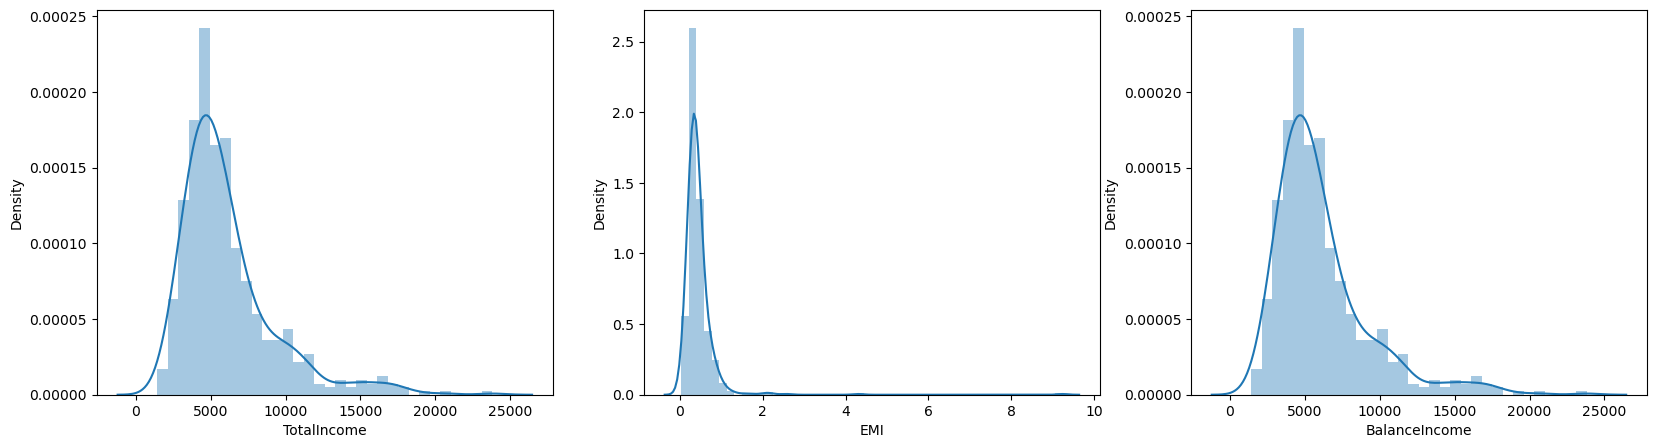

In [100]:
newtrain['TotalIncome']=newtrain['ApplicantIncome']+newtrain['CoapplicantIncome']
newtrain['EMI']=newtrain['LoanAmount']/newtrain['Loan_Amount_Term']
newtrain['BalanceIncome']=newtrain['TotalIncome']-newtrain['EMI']

plt.figure(1,figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(newtrain['TotalIncome'])
plt.subplot(1,3,2)
sns.distplot(newtrain['EMI'])
plt.subplot(1,3,3)
sns.distplot(newtrain['BalanceIncome'])
plt.show()

In [101]:
newtest['TotalIncome']=newtest['ApplicantIncome']+newtest['CoapplicantIncome']
newtest['EMI']=newtest['LoanAmount']/newtest['Loan_Amount_Term']
newtest['BalanceIncome']=newtest['TotalIncome']-newtest['EMI']

In [102]:
newtrain.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)
newtest.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)

# Testing multiple models

In [103]:
x=newtrain.drop('Loan_Status', axis=1)
y=newtrain['Loan_Status']

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
dt=DecisionTreeClassifier()

In [112]:
def model(model_name,feature,target):
    i=1
    kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    for train_index,test_index in kf.split(x,y):
        print('{} of kfold {}'.format(i,kf.n_splits))
        xtr,xte= x.iloc[train_index],x.iloc[test_index]
        ytr,yte=y.iloc[train_index],y.iloc[test_index]
        
        model=model_name
        model.fit(xtr,ytr)
        pred=model.predict(xte)
        score=accuracy_score(yte,pred)
        print('Accuracy_score: ',score)
        i+=1
        pred_test=model.predict(newtest)
        pred=model.predict_proba(xte)[:,1]
    

In [113]:
model(LogisticRegression(),x,y)

1 of kfold 5
Accuracy_score:  0.8235294117647058
2 of kfold 5
Accuracy_score:  0.7966101694915254
3 of kfold 5
Accuracy_score:  0.8220338983050848
4 of kfold 5
Accuracy_score:  0.8135593220338984
5 of kfold 5
Accuracy_score:  0.8135593220338984


In [115]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',2:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('LogisticRegression2.csv')

In [116]:
model(dt,x,y)

1 of kfold 5
Accuracy_score:  0.7310924369747899
2 of kfold 5
Accuracy_score:  0.6694915254237288
3 of kfold 5
Accuracy_score:  0.7542372881355932
4 of kfold 5
Accuracy_score:  0.7203389830508474
5 of kfold 5
Accuracy_score:  0.7796610169491526


In [117]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',2:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTreeClassifier.csv')

In [118]:
model(RandomForestClassifier(max_depth=10, random_state=2),x,y)

1 of kfold 5
Accuracy_score:  0.8067226890756303
2 of kfold 5
Accuracy_score:  0.788135593220339
3 of kfold 5
Accuracy_score:  0.8135593220338984
4 of kfold 5
Accuracy_score:  0.788135593220339
5 of kfold 5
Accuracy_score:  0.8220338983050848


# GridSearchCV

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
parameters={'max_depth':list(range(1,20,2)),'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestClassifier(random_state=1), parameters)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.25)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [122]:
grid.best_params_
grid.best_score_
print(grid.best_estimator_)
model=grid.best_estimator_
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

RandomForestClassifier(max_depth=5, n_estimators=21, random_state=1)


In [123]:
rfc=RandomForestClassifier(max_depth=5,n_estimators=21 ,random_state=1)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)

In [125]:
pred_test=rfc.predict(newtest)

In [126]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',2:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RandomForestClassifier.csv')

# Feature Importance

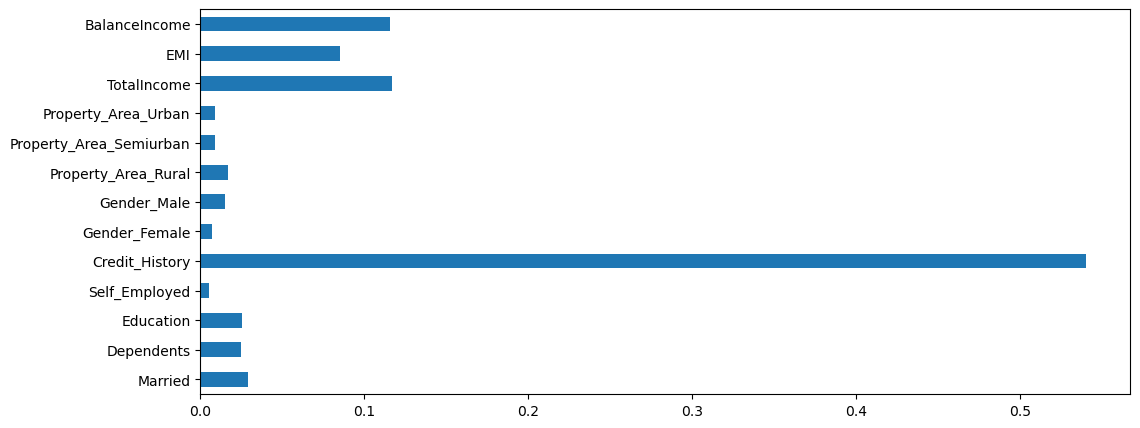

In [128]:
importances=pd.Series(rfc.feature_importances_, index=x.columns)
importances.plot(kind='barh',figsize=(12,5));

# THANK YOU ...